# Visualización estadística con seaborn

[seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html) es una biblioteca de visualización construida sobre matplotlib, por lo que complementa a esta biblioteca y permite combinarlas. Intenta ser una interfaz de más "alto nivel" que matplotlib.

Incluye la definición de "temas" y trata de extraer la máxima información de los dataframes para hacer los gráficos más informativos. También agrupa muchas de las funcionalidades de matplotlib de manera más ordenada.

## Un ejemplo como comparación

In [1]:
import statsmodels.api as sm
skulls = sm.datasets.get_rdataset("skulls", "HSAUR")
#print skulls.__doc__
data = skulls.data
data.head()

,epoch,mb,bh,bl,nh
0,c4000BC,131,138,89,49
1,c4000BC,125,131,92,48
2,c4000BC,131,132,99,50
3,c4000BC,119,132,96,44
4,c4000BC,136,143,100,54


Primero podemos intentar ver los estadísticos fundamentales.

/Users/msicilia/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/msicilia/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x119ba5c50>,
 'caps': [<matplotlib.lines.Line2D at 0x119bb7b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x119bc5e90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119bc5850>,
 'whiskers': [<matplotlib.lines.Line2D at 0x119ba5e50>,
  <matplotlib.lines.Line2D at 0x119c149d0>]}

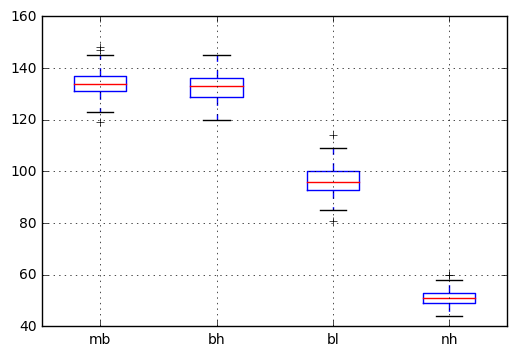

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
# Tenemos que eliminar la variable categórica:
cols = ["mb", "bh", "bl", "nh"]
data[cols].boxplot()

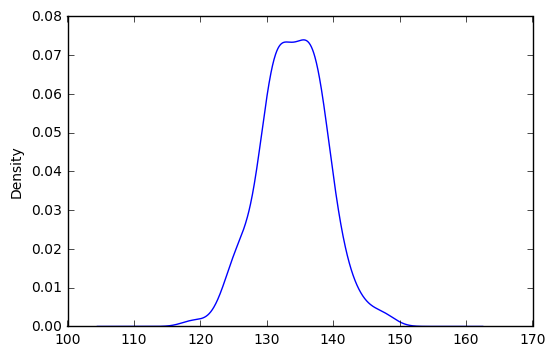

In [3]:
data["mb"].plot(kind="kde")

Podemos hacer lo mismo con seaborn, pero vemos que las diferencias son básicamente relativas al estilo, ya que aplica por defecto un tema gráfico con fondo sombreado.

<class 'matplotlib.axes._subplots.AxesSubplot'>


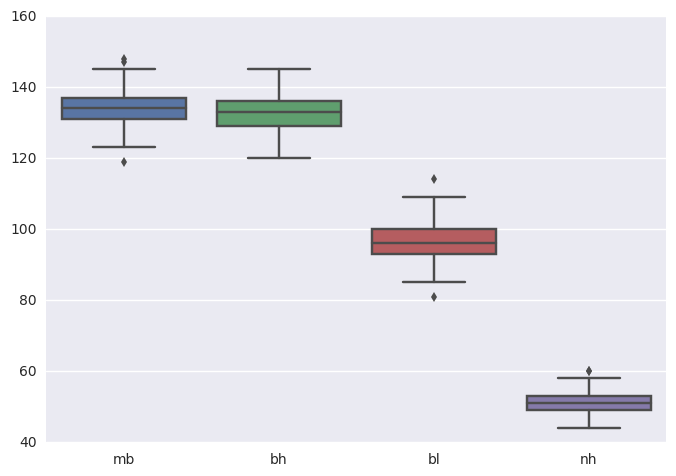

In [4]:
import seaborn as sns
ax = sns.boxplot(data=data)
print type(ax) # A matplotlib object

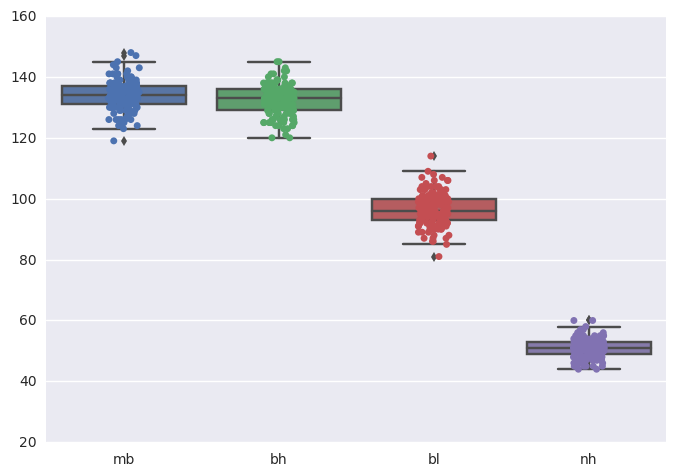

In [5]:
sns.boxplot(data=data)
sns.set_style("whitegrid")
ax = sns.stripplot(data=data, jitter=True, size=5)

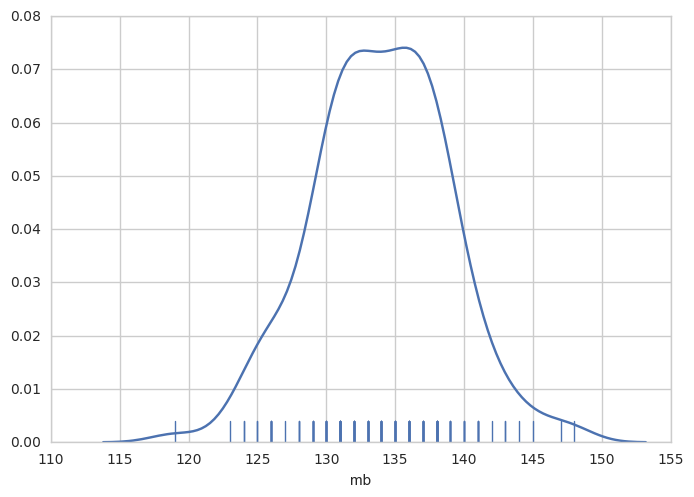

In [6]:
sns.distplot(data["mb"], hist=False, rug=True)

## Ejemplos adicionales

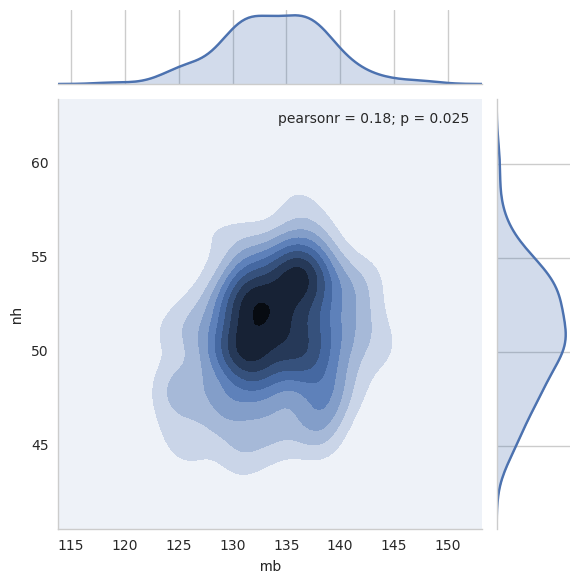

In [7]:
sns.jointplot(x="mb", y="nh", data=data, kind="kde")

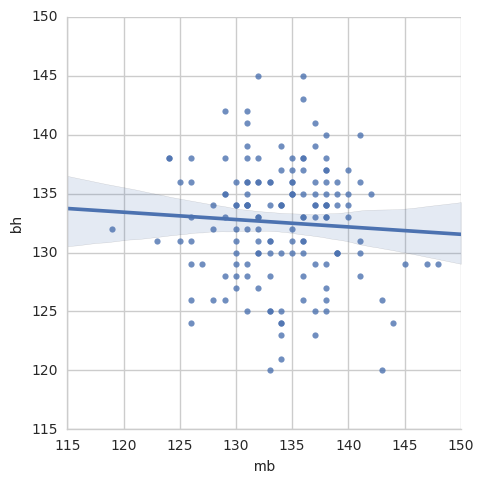

In [8]:
sns.lmplot(x="mb", y="bh", data=data)

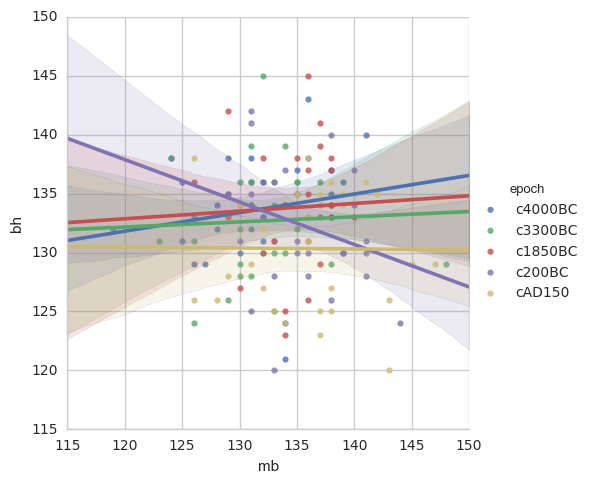

In [9]:
sns.lmplot(x="mb", y="bh", data=data, hue="epoch")